In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loadind dataset as dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# last five rows
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking for number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# Get some statistical measure for data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# finding correlation between data set
# Positive and Negative correlation

In [ ]:
import pandas as pd

# Assuming your gold data is in a CSV file named 'gold_data.csv'
gold_data = pd.read_csv('/content/gld_price_data.csv') # Load your data into a pandas DataFrame

# Convert 'Date' column to datetime objects first, if it exists
if 'Date' in gold_data.columns:
    gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Then extract numerical features for correlation analysis along with date
numerical_features = gold_data.select_dtypes(include=['number']).columns.tolist()
# If 'Date' is already datetime and you want to include it in the correlation:
# numerical_features.append('Date')

gold_data_numeric = gold_data[numerical_features]

# Calculate correlation on numerical features only
correlation = gold_data_numeric.corr()

<Axes: >

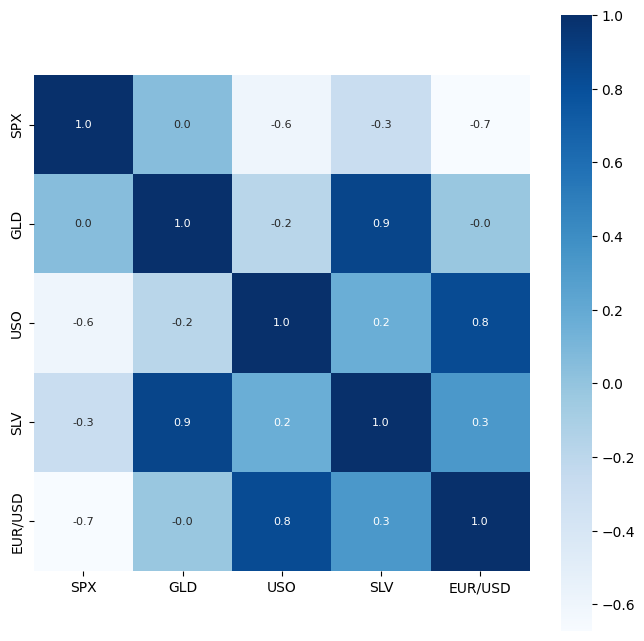

In [ ]:
# Constructing a Heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print (correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


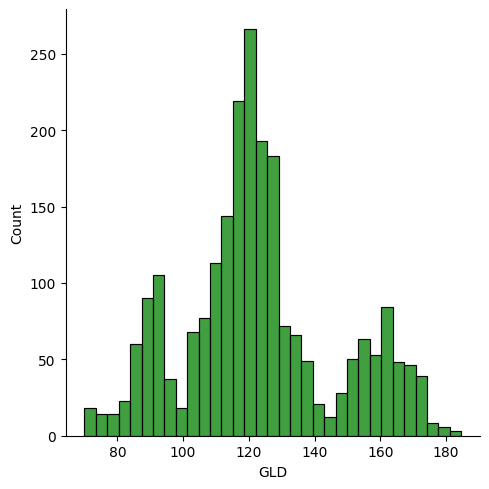

In [ ]:
sns.displot(gold_data['GLD'], color='green')

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#Splitting the data and target
X= gold_data.drop(['Date','GLD'], axis=1)
Y= gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [ ]:
# Test data prediction
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.50589922  82.14369981 116.08230035 127.63590093 120.7773014
 154.6876974  149.8850985  126.18289988 117.45289887 126.03200063
 116.44140109 171.78000091 141.45559809 167.76899852 115.21359995
 117.99530018 137.99770311 169.8667008  159.55450266 157.73260042
 155.13750041 125.08170019 175.74480039 157.21440401 125.16810047
  93.78209958  76.9511003  120.96900018 119.08979948 167.50809994
  88.00530012 125.35419991  91.19210075 117.55300025 121.19989892
 136.2317006  115.71380062 114.88230068 147.42139967 107.41770113
 104.10850255  87.26539793 126.51990028 117.82959977 153.21479906
 119.60670018 108.47569983 108.09049834  93.18920087 127.29009745
  74.83460049 113.60339932 121.15690011 111.19519924 118.82429902
 120.54449959 158.91399955 167.42950088 147.02399671  85.81349857
  94.21680011  86.70429854  90.43010017 119.02210069 126.43240065
 127.51839988 170.27700033 122.23229943 117.36049935  98.75390012
 167.53750141 143.16949791 132.64590276 121.18940207 120.50419943
 119.699200

In [ ]:
#R squared error
error_score= metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9898880961281477


In [ ]:
# Compare actual value and predicted value
Y_test = list(Y_test)

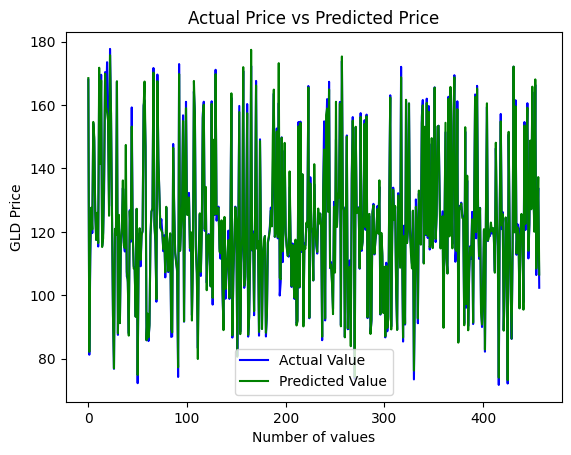

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()